We have data for 4 majors both for women and men. 

Let us look at Australian mens data set to get a feel for the data. 

In [1]:
#import required modules. we will need stats and pandas
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy import stats

In [2]:
df_aus_m=pd.read_csv("AusOpen-men-2013.csv")

Check basics of data

In [6]:
df_aus_m.describe()

,Round,Result,FNL1,FNL2,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,125.000000,...,126.000000,126.000000,104.000000,104.000000,126.000000,126.000000,125.000000,121.000000,59.000000,21.000000
mean,1.936508,0.531746,1.880952,1.706349,61.325397,48.944444,38.674603,21.753968,10.531746,4.344000,...,3.404762,8.563492,16.201923,23.884615,110.071429,4.984127,4.776000,4.867769,4.423729,5.000000
std,1.275906,0.500983,1.243268,1.308847,7.140677,15.142156,7.140677,8.484986,7.535183,3.157439,...,2.504966,5.308855,9.345971,13.328055,34.869168,1.846008,1.848557,1.830037,2.077825,1.702939
min,1.000000,0.000000,0.000000,0.000000,46.000000,14.000000,18.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,5.000000,24.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,1.000000,0.000000,57.000000,37.250000,34.250000,17.000000,5.000000,2.000000,...,1.000000,4.000000,10.000000,13.750000,86.500000,4.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,1.000000,2.000000,2.000000,61.000000,49.000000,39.000000,22.000000,9.000000,4.000000,...,3.000000,8.000000,14.000000,20.500000,110.000000,6.000000,6.000000,6.000000,6.000000,6.000000
75%,2.000000,1.000000,3.000000,3.000000,65.750000,57.000000,43.000000,28.000000,14.000000,6.000000,...,5.000000,12.000000,22.250000,32.750000,134.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,7.000000,1.000000,3.000000,3.000000,82.000000,109.000000,54.000000,47.000000,41.000000,18.000000,...,10.000000,22.000000,49.000000,66.000000,230.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [7]:
df_aus_m.head(4)

,Player1,Player2,Round,Result,FNL1,FNL2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,Lukas Lacko,Novak Djokovic,1,0,0,3,61,35,39,18,...,4,8,8,9,101,6,7,6,NaN,NaN
1,Leonardo Mayer,Albert Montanes,1,1,3,0,61,31,39,13,...,0,0,NaN,NaN,42,1,3,1,NaN,NaN
2,Marcos Baghdatis,Denis Istomin,1,0,0,3,52,53,48,20,...,4,13,12,16,126,6,7,6,NaN,NaN
3,Dmitry Tursunov,Michael Russell,1,1,3,0,53,39,47,24,...,1,7,NaN,NaN,79,2,2,3,NaN,NaN


In [8]:
df_aus_m.tail(4)

,Player1,Player2,Round,Result,FNL1,FNL2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
122,Rafael Nadal,Grigor Dimitrov,5,1,3,1,73,66,27,22,...,3,6,28,41,132,6,6,6,2,NaN
123,Tomas Berdych,Stanislas Wawrinka,6,0,1,3,62,71,38,30,...,1,4,14,18,143,6,6,7,7,NaN
124,Rafael Nadal,Roger Federer,6,1,3,0,65,41,35,22,...,1,2,23,42,86,6,3,3,NaN,NaN
125,Rafael Nadal,Stanislas Wawrinka,7,0,1,3,78,50,22,10,...,5,15,11,12,116,6,6,3,6,NaN


What are the attributes we have: First and second serve % and points won. braeks points created and converted, net points created and won, number of games won, double faults commited etc

Let us also look if the data is sparse or not. And let us do that for all data sets.

In [9]:
print df_aus_m.isnull().sum()

Player1      0
Player2      0
Round        0
Result       0
FNL1         0
FNL2         0
FSP.1        0
FSW.1        0
SSP.1        0
SSW.1        0
ACE.1        0
DBF.1        1
WNR.1        0
UFE.1        0
BPC.1        0
BPW.1        0
NPA.1       22
NPW.1       22
TPW.1        0
ST1.1        0
ST2.1        1
ST3.1        5
ST4.1       67
ST5.1      105
FSP.2        0
FSW.2        0
SSP.2        0
SSW.2        0
ACE.2        0
DBF.2        1
WNR.2        0
UFE.2        0
BPC.2        0
BPW.2        0
NPA.2       22
NPW.2       22
TPW.2        0
ST1.2        0
ST2.2        1
ST3.2        5
ST4.2       67
ST5.2      105
dtype: int64


In [10]:
df_aus_w=pd.read_csv("AusOpen-women-2013.csv")
df_aus_m=pd.read_csv("AusOpen-men-2013.csv")
df_french_w=pd.read_csv("FrenchOpen-women-2013.csv")
df_french_m=pd.read_csv("FrenchOpen-men-2013.csv")
df_wimb_w=pd.read_csv("Wimbledon-women-2013.csv")
df_wimb_m=pd.read_csv("Wimbledon-men-2013.csv")
df_us_w=pd.read_csv("USOpen-women-2013.csv")
df_us_m=pd.read_csv("USOpen-men-2013.csv")


In [11]:
print df_aus_w.isnull().sum()

Player1      0
Player2      0
Round        0
Result       0
FNL1         1
FNL2         1
FSP.1        0
FSW.1        0
SSP.1        0
SSW.1        0
ACE.1        5
DBF.1        1
WNR.1        0
UFE.1        0
BPC.1        1
BPW.1        1
NPA.1       22
NPW.1       22
TPW.1        0
ST1.1        1
ST2.1        1
ST3.1       85
ST4.1      127
ST5.1      127
FSP.2        0
FSW.2        0
SSP.2        0
SSW.2        0
ACE.2        5
DBF.2        1
WNR.2        0
UFE.2        0
BPC.2        1
BPW.2        1
NPA.2       22
NPW.2       22
TPW.2        0
ST1.2        1
ST2.2        1
ST3.2       85
ST4.2      127
ST5.2      127
dtype: int64


In [12]:
print df_french_m.isnull().sum()

Player1      0
Player2      0
Round        0
Result       0
FNL.1        0
FNL.2        0
FSP.1        0
FSW.1        0
SSP.1        0
SSW.1        0
ACE.1        0
DBF.1        2
WNR.1        0
UFE.1        0
BPC.1        0
BPW.1        0
NPA.1        0
NPW.1        0
TPW.1        0
ST1.1        0
ST2.1        0
ST3.1        2
ST4.1       74
ST5.1      103
FSP.2        0
FSW.2        0
SSP.2        0
SSW.2        0
ACE.2        0
DBF.2        2
WNR.2        0
UFE.2        0
BPC.2        0
BPW.2        0
NPA.2        0
NPW.2        0
TPW.2        0
ST1.2        0
ST2.2        0
ST3.2        2
ST4.2       74
ST5.2      103
dtype: int64


In [13]:
print df_french_w.isnull().sum()

Player1      0
Player2      0
Round        0
Result       0
FNL.1        0
FNL.2        0
FSP.1        0
FSW.1        0
SSP.1        0
SSW.1        0
ACE.1       13
DBF.1        3
WNR.1        0
UFE.1        0
BPC.1        0
BPW.1        0
NPA.1        0
NPW.1        0
TPW.1        0
ST1.1        0
ST2.1        2
ST3.1       89
ST4.1      127
ST5.1      127
FSP.2        0
FSW.2        0
SSP.2        0
SSW.2        0
ACE.2       13
DBF.2        3
WNR.2        0
UFE.2        0
BPC.2        0
BPW.2        0
NPA.2        0
NPW.2        0
TPW.2        0
ST1.2        0
ST2.2        2
ST3.2       89
ST4.2      127
ST5.2      127
dtype: int64


In [14]:
print df_wimb_m.isnull().sum()

Player1      0
Player2      0
Round        0
Result       0
FNL.1        0
FNL.2        0
FSP.1        0
FSW.1        0
SSP.1        0
SSW.1        0
ACE.1        0
DBF.1        1
WNR.1        0
UFE.1        0
BPC.1        0
BPW.1        0
NPA.1        0
NPW.1        0
TPW.1      114
ST1.1        0
ST2.1        0
ST3.1        0
ST4.1       70
ST5.1       96
FSP.2        0
FSW.2        0
SSP.2        0
SSW.2        0
ACE.2        0
DBF.2        1
WNR.2        0
UFE.2        0
BPC.2        0
BPW.2        0
NPA.2        0
NPW.2        0
TPW.2      114
ST1.2        0
ST2.2        0
ST3.2        0
ST4.2       70
ST5.2       96
dtype: int64


In [15]:
print df_wimb_w.isnull().sum()

Player1      0
Player2      0
Round        0
Result       0
FNL.1        0
FNL.2        0
FSP.1        0
FSW.1        0
SSP.1        0
SSW.1        0
ACE.1        4
DBF.1        0
WNR.1        0
UFE.1        0
BPC.1        0
BPW.1        0
NPA.1        0
NPW.1        0
TPW.1      122
ST1.1        0
ST2.1        0
ST3.1       83
ST4.1      122
ST5.1      122
FSP.2        0
FSW.2        0
SSP.2        0
SSW.2        0
ACE.2        4
DBF.2        0
WNR.2        0
UFE.2        0
BPC.2        0
BPW.2        0
NPA.2        0
NPW.2        0
TPW.2      122
ST1.1.1      0
ST2.2        0
ST3.2       83
ST4.2      122
ST5.2      122
dtype: int64


In [16]:
print df_us_m.isnull().sum()

Player1      0
Player2      0
Round        0
Result       0
FNL1         0
FNL2         0
FSP.1        0
FSW.1        0
SSP.1        0
SSW.1        0
ACE.1        0
DBF.1        0
WNR.1      126
UFE.1      126
BPC.1        0
BPW.1        0
NPA.1       38
NPW.1       38
TPW.1        0
ST1.1        0
ST2.1        0
ST3.1        1
ST4.1       59
ST5.1      101
FSP.2        0
FSW.2        0
SSP.2        0
SSW.2        0
ACE.2        0
DBF.2        0
WNR.2      126
UFE.2      126
BPC.2        0
BPW.2        0
NPA.2       38
NPW.2       38
TPW.2        0
ST1.2        0
ST2.2        0
ST3.2        1
ST4.2       59
ST5.2      101
dtype: int64


In [17]:
print df_us_w.isnull().sum()

Player 1     0
Player 2     0
ROUND        0
Result       0
FNL.1        0
FNL.2        0
FSP.1        0
FSW.1        0
SSP.1        0
SSW.1        0
ACE.1        0
DBF.1        0
WNR.1        0
UFE.1        0
BPC.1        0
BPW.1        0
NPA.1        2
NPW.1        1
TPW.1       76
ST1.1        0
ST2.1        0
ST3.1       56
ST4.1       76
ST5.1       76
FSP.2        0
FSW.2        0
SSP.2        0
SSW.2        0
ACE.2        0
DBF.2        0
WNR.2        0
UFE.2        0
BPC.2        0
BPW.2        0
NPA.2        2
NPW.2        1
TPW.2       76
ST2.1.1      0
ST2.2        0
ST3.2       56
ST4.2       76
ST5.2       76
dtype: int64


We see that data is not sparse. Nan values are there for set 4 and 5 in mens and set 3,4,and 5 in womens which is expected as mens game has a max of 5 sets and most games are 3 sets and womens game is max 3 sets with most games being 2 setters. 
In Australian open data: 22 Nans in both mens and womens data for attributes NPA and NPW. 
In French open data: 13 Nans in womens data for attribute ACE. 
In wimbledon: 114 Nans in mens data for attribute and 122 Nana in womens data for attribute TPW.
In US open: 126  Nans in mens data for attributes WNR and UFE and 76 Nans in womens data for attribute TPW.



What are the questions we can ask. The courts have different charachteristics, one is grass, 2 are hard courts and one is clay. One can expect differences between some attributes based on where the game is played. We should compare stats for only winners or losers across surface, because the stats for winners and losers will be different. We can loop through the attributes and compare stats between majors. We can do the t-test to see if the populations differ. One can expect some difference in attributes like break points attempted and no of aces based on surface.
So the questions are: 
1) Can we guess the major based on values of a particular attribute say like number of aces or break points created etc.
2) Will any attribute be different for winners and losers? One would expect so.
3) Can one differentiate between men and womens game based on a few attributes irrespective of major and or winners and losers. One would think so.

Let us read in data for all the data, then split each data set into winners and losers and see what we get.

In [18]:
#print df_aus_w.head(3)
#print df_aus_w.describe()
#print df_aus_w.isnull().sum()
# We split the data based on whether the attribute "Result" is 1 or 0. This will help us collate winner and loser data easily.
df_aus_w_win = df_aus_w[df_aus_w["Result"]==1] # 
df_aus_w_los = df_aus_w[df_aus_w["Result"]==0] # 

#print df_aus_m.head(3)
#print df_aus_m.describe()
#print df_aus_m.isnull().sum()
df_aus_m_win = df_aus_m[df_aus_m["Result"]==1]
df_aus_m_los = df_aus_m[df_aus_m["Result"]==0]

#print df_french_w.head(3)
#print df_french_w.describe()
#print df_french_w.isnull().sum()
df_french_w_win = df_french_w[df_french_w["Result"]==1]
df_french_w_los = df_french_w[df_french_w["Result"]==0]

#print df_french_m.head(3)
#print df_french_m.describe()
#print df_french_m.isnull().sum()
df_french_m_win = df_french_m[df_french_m["Result"]==1]
df_french_m_los = df_french_m[df_french_m["Result"]==0]

#print df_wimb_w.head(3)
#print df_wimb_w.describe()
#print df_wimb_w.isnull().sum()
df_wimb_w_win = df_wimb_w[df_wimb_w["Result"]==1]
df_wimb_w_los = df_wimb_w[df_wimb_w["Result"]==0]

#print df_wimb_m.head(3)
#print df_wimb_m.describe()
#print df_wimb_m.isnull().sum()
df_wimb_m_win = df_wimb_m[df_wimb_m["Result"]==1]
df_wimb_m_los = df_wimb_m[df_wimb_m["Result"]==0]

#print df_us_w.head(3)
#print df_us_w.describe()
#print df_us_w.isnull().sum()
df_us_w_win = df_us_w[df_us_w["Result"]==1]
df_us_w_los = df_us_w[df_us_w["Result"]==0]

#print df_us_m.head(3)
#print df_us_m.describe()
#print df_us_m.isnull().sum()
df_us_m_win = df_us_m[df_us_m["Result"]==1]
df_us_m_los = df_us_m[df_us_m["Result"]==0]


In [20]:
#for each attribute we compute t-value
attribs = ["FSP","FSW","SSP","SSW","ACE","DBF","WNR","UFE","BPC","BPW","NPA","NPW","TPW"]
for i in attribs:
      val1 = i+".1"
      val2 = i+".2"
      df_a1 = df_aus_w_win[val1]
      df_a2 = df_aus_w_los[val2]
      df_a = pd.concat([df_a1,df_a2]) # add winners
      df_f1 = df_french_w_win[val1]
      df_f2 = df_french_w_los[val2]
      df_f = pd.concat([df_f1,df_f2])
      df_w1 = df_wimb_w_win[val1]
      df_w2 = df_wimb_w_los[val2]
      df_w = pd.concat([df_w1,df_w2])
      df_u1 = df_us_w_win[val1]
      df_u2 = df_us_w_los[val2]
      df_u = pd.concat([df_u1,df_u2])
      
      t1,p1 = ttest_ind(df_a.dropna(), df_f.dropna())
      if (p1 <=0.05):
        print "womens,winners, aus, french",i, p1,len(df_a.dropna()),len(df_f.dropna())
      t2,p2 = ttest_ind(df_a.dropna(), df_w.dropna())
      if (p2 <=0.05):
        print "womens,winners, aus, wimb",i,p2,len(df_a.dropna()),len(df_w.dropna())
      t3,p3 = ttest_ind(df_a.dropna(), df_u.dropna())
      if (p3 <=0.05):
        print "womens,winners, aus, us",i,p3,len(df_a.dropna()),len(df_u.dropna())
      t4,p4 = ttest_ind(df_f.dropna(), df_w.dropna())
      if (p4 <=0.05):
        print "womens,winners, french, wimb",i,p4,len(df_f.dropna()),len(df_w.dropna())
      t5,p5 = ttest_ind(df_f.dropna(), df_u.dropna())
      if (p5 <=0.05):
        print "womens,winners, french, us",i,p5,len(df_f.dropna()),len(df_u.dropna())
      t6,p6 = ttest_ind(df_w.dropna(), df_u.dropna())
      if (p6 <=0.05):
        print "womens,winners, wimb, us",i,p6,len(df_w.dropna()),len(df_u.dropna())  

womens,winners, aus, french FSP 0.0175978017525 127 127
womens,winners, french, us FSP 0.0245662929075 127 76
womens,winners, aus, french SSP 0.0175978017525 127 127
womens,winners, french, us SSP 0.00869740099201 127 76
womens,winners, wimb, us SSP 0.0195743924002 122 76
womens,winners, aus, french ACE 0.0070899367981 122 114
womens,winners, french, wimb ACE 0.00047539434293 114 118
womens,winners, aus, french DBF 0.00788799939753 126 124
womens,winners, aus, french WNR 2.67299118132e-06 127 127
womens,winners, aus, wimb WNR 4.00741663401e-06 127 122
womens,winners, french, us WNR 0.0349103895115 127 76
womens,winners, wimb, us WNR 0.0441707620183 122 76
womens,winners, french, wimb UFE 0.00123675300686 127 122
womens,winners, wimb, us UFE 0.00549575632176 122 76
womens,winners, aus, wimb BPC 5.96570803597e-26 126 122
womens,winners, aus, us BPC 3.4192148455e-31 126 76
womens,winners, french, wimb BPC 4.0232302213e-25 127 122
womens,winners, french, us BPC 6.55727562837e-30 127 76
wom

let us repeat for womens losers, mens winners and losers.

In [21]:
for i in attribs:
      val1 = i+".1"
      val2 = i+".2"
      df_a1 = df_aus_m_win[val1]
      df_a2 = df_aus_m_los[val2]
      df_a = pd.concat([df_a1,df_a2]) # add winners
      df_f1 = df_french_m_win[val1]
      df_f2 = df_french_m_los[val2]
      df_f = pd.concat([df_f1,df_f2])
      df_w1 = df_wimb_m_win[val1]
      df_w2 = df_wimb_m_los[val2]
      df_w = pd.concat([df_w1,df_w2])
      df_u1 = df_us_m_win[val1]
      df_u2 = df_us_m_los[val2]
      df_u = pd.concat([df_u1,df_u2])
      
      t1,p1 = ttest_ind(df_a.dropna(), df_f.dropna())
      if (p1 <=0.05):
        print "mens,winners, aus, french",i, p1,len(df_a.dropna()),len(df_f.dropna())
      t2,p2 = ttest_ind(df_a.dropna(), df_w.dropna())
      if (p2 <=0.05):
        print "mens,winners, aus, wimb",i,p2,len(df_a.dropna()),len(df_w.dropna())
      t3,p3 = ttest_ind(df_a.dropna(), df_u.dropna())
      if (p3 <=0.05):
        print "mens,winners, aus, us",i,p3,len(df_a.dropna()),len(df_u.dropna())
      t4,p4 = ttest_ind(df_f.dropna(), df_w.dropna())
      if (p4 <=0.05):
        print "mens,winners, french, wimb",i,p4,len(df_f.dropna()),len(df_w.dropna())
      t5,p5 = ttest_ind(df_f.dropna(), df_u.dropna())
      if (p5 <=0.05):
        print "mens,winners, french, us",i,p5,len(df_f.dropna()),len(df_u.dropna())
      t6,p6 = ttest_ind(df_w.dropna(), df_u.dropna())
      if (p6 <=0.05):
        print "mens,winners, wimb, us",i,p6,len(df_w.dropna()),len(df_u.dropna())  

mens,winners, aus, wimb FSP 0.0011877332645 126 114
mens,winners, aus, us FSP 0.00858631052135 126 126
mens,winners, french, us FSP 0.000318627741808 125 126
mens,winners, wimb, us FSP 7.79159947832e-09 114 126
mens,winners, wimb, us FSW 0.00390610008828 114 126
mens,winners, aus, wimb SSP 0.0011877332645 126 114
mens,winners, aus, us SSP 0.00858631052135 126 126
mens,winners, french, us SSP 0.000318627741808 125 126
mens,winners, wimb, us SSP 7.79159947832e-09 114 126
mens,winners, french, us SSW 0.00754852501322 125 126
mens,winners, wimb, us SSW 0.00392270453453 114 126
mens,winners, aus, french ACE 3.12545177107e-05 126 125
mens,winners, aus, wimb ACE 0.00744571981732 126 114
mens,winners, aus, us ACE 0.0488062166996 126 126
mens,winners, french, wimb ACE 1.69625624382e-12 125 114
mens,winners, french, us ACE 0.0203924970029 125 126
mens,winners, wimb, us ACE 1.66318477979e-06 114 126
mens,winners, aus, french DBF 0.000820102474886 125 123
mens,winners, aus, wimb DBF 0.004892204434

In [22]:
for i in attribs:
      val1 = i+".1"
      val2 = i+".2"
      df_a1 = df_aus_w_win[val2]
      df_a2 = df_aus_w_los[val1]
      df_a = pd.concat([df_a1,df_a2]) # add losers
      df_f1 = df_french_w_win[val2]
      df_f2 = df_french_w_los[val1]
      df_f = pd.concat([df_f1,df_f2])
      df_w1 = df_wimb_w_win[val2]
      df_w2 = df_wimb_w_los[val1]
      df_w = pd.concat([df_w1,df_w2])
      df_u1 = df_us_w_win[val2]
      df_u2 = df_us_w_los[val1]
      df_u = pd.concat([df_u1,df_u2])
      
      t1,p1 = ttest_ind(df_a.dropna(), df_f.dropna())
      if (p1 <=0.05):
        print "womens,losers, aus, french",i, p1,len(df_a.dropna()),len(df_f.dropna())
      t2,p2 = ttest_ind(df_a.dropna(), df_w.dropna())
      if (p2 <=0.05):
        print "womens,losers, aus, wimb",i,p2,len(df_a.dropna()),len(df_w.dropna())
      t3,p3 = ttest_ind(df_a.dropna(), df_u.dropna())
      if (p3 <=0.05):
        print "womens,losers, aus, us",i,p3,len(df_a.dropna()),len(df_u.dropna())
      t4,p4 = ttest_ind(df_f.dropna(), df_w.dropna())
      if (p4 <=0.05):
        print "womens,losers, french, wimb",i,p4,len(df_f.dropna()),len(df_w.dropna())
      t5,p5 = ttest_ind(df_f.dropna(), df_u.dropna())
      if (p5 <=0.05):
        print "womens,losers, french, us",i,p5,len(df_f.dropna()),len(df_u.dropna())
      t6,p6 = ttest_ind(df_w.dropna(), df_u.dropna())
      if (p6 <=0.05):
        print "womens,losers, wimb, us",i,p6,len(df_w.dropna()),len(df_u.dropna())  

womens,losers, aus, french FSP 0.0177085399259 127 127
womens,losers, french, us FSP 0.00342048755632 127 76
womens,losers, wimb, us FSP 0.014253837031 122 76
womens,losers, aus, french SSP 0.0177085399259 127 127
womens,losers, french, us SSP 0.00175177057141 127 76
womens,losers, wimb, us SSP 0.00787553749475 122 76
womens,losers, french, wimb SSW 0.0463468830995 127 122
womens,losers, aus, french ACE 0.0261188698679 122 114
womens,losers, french, wimb ACE 0.0254060467854 114 118
womens,losers, aus, french DBF 0.000506144836731 126 124
womens,losers, aus, wimb DBF 3.85773384693e-05 126 122
womens,losers, french, us DBF 0.010626693725 124 76
womens,losers, wimb, us DBF 0.0012539171871 122 76
womens,losers, aus, french WNR 0.00957370985376 127 127
womens,losers, aus, wimb WNR 0.00507429941074 127 122
womens,losers, wimb, us WNR 0.0459710290726 122 76
womens,losers, aus, wimb UFE 0.000149146394716 127 122
womens,losers, french, wimb UFE 4.83063786882e-05 127 122
womens,losers, wimb, us 

In [23]:
for i in attribs:
      val1 = i+".1"
      val2 = i+".2"
      df_a1 = df_aus_m_win[val2]
      df_a2 = df_aus_m_los[val1]
      df_a = pd.concat([df_a1,df_a2]) # add losers
      df_f1 = df_french_m_win[val2]
      df_f2 = df_french_m_los[val1]
      df_f = pd.concat([df_f1,df_f2])
      df_w1 = df_wimb_m_win[val2]
      df_w2 = df_wimb_m_los[val1]
      df_w = pd.concat([df_w1,df_w2])
      df_u1 = df_us_m_win[val2]
      df_u2 = df_us_m_los[val1]
      df_u = pd.concat([df_u1,df_u2])
      
      t1,p1 = ttest_ind(df_a.dropna(), df_f.dropna())
      if (p1 <=0.05):
        print "mens,losers, aus, french",i, p1,len(df_a.dropna()),len(df_f.dropna())
      t2,p2 = ttest_ind(df_a.dropna(), df_w.dropna())
      if (p2 <=0.05):
        print "mens,losers, aus, wimb",i,p2,len(df_a.dropna()),len(df_w.dropna())
      t3,p3 = ttest_ind(df_a.dropna(), df_u.dropna())
      if (p3 <=0.05):
        print "mens,losers, aus, us",i,p3,len(df_a.dropna()),len(df_u.dropna())
      t4,p4 = ttest_ind(df_f.dropna(), df_w.dropna())
      if (p4 <=0.05):
        print "mens,losers, french, wimb",i,p4,len(df_f.dropna()),len(df_w.dropna())
      t5,p5 = ttest_ind(df_f.dropna(), df_u.dropna())
      if (p5 <=0.05):
        print "mens,losers, french, us",i,p5,len(df_f.dropna()),len(df_u.dropna())
      t6,p6 = ttest_ind(df_w.dropna(), df_u.dropna())
      if (p6 <=0.05):
        print "mens,losers, wimb, us",i,p6,len(df_w.dropna()),len(df_u.dropna())  

mens,losers, aus, wimb FSP 0.00415472935191 126 114
mens,losers, aus, us FSP 0.00244651560633 126 126
mens,losers, french, us FSP 4.57594284264e-05 125 126
mens,losers, wimb, us FSP 4.08507803116e-09 114 126
mens,losers, french, wimb FSW 0.0153440436378 125 114
mens,losers, wimb, us FSW 0.0166698271514 114 126
mens,losers, aus, wimb SSP 0.00415472935191 126 114
mens,losers, aus, us SSP 0.00244651560633 126 126
mens,losers, french, us SSP 4.57594284264e-05 125 126
mens,losers, wimb, us SSP 4.08507803116e-09 114 126
mens,losers, aus, french ACE 9.49990526296e-07 126 125
mens,losers, french, wimb ACE 1.47461160957e-08 125 114
mens,losers, french, us ACE 1.05022333863e-06 125 126
mens,losers, aus, french DBF 0.00179920702341 125 123
mens,losers, aus, wimb DBF 0.011188049077 125 113
mens,losers, aus, us DBF 0.0439007316849 125 126
mens,losers, french, us DBF 7.55688893082e-08 123 126
mens,losers, wimb, us DBF 1.82337483359e-06 113 126
mens,losers, aus, wimb WNR 0.00166891992748 126 114
mens

So it looks like there are a few attributes which vary based on where the game is played. From the above list thesea are Serve % both 1st and 2nd, Net point Attempted and won, Break points won and created, no of double faults and no of aces. This is as expected. But is there any single attribute which can differentiate between all the 6 possible pairs of majors? No at best any single attribute can difeerentiate between 5 possible pairs of majors. And the attribute differs based on whether it is mens or womens game and if the stats are for winners or losers. Maybe we can come up with a combination of attributes which can do this. That will take time to find out.

Let us try how data for winners and losers varies.

In [24]:
for i in attribs:
       val1 = i+".1"
       val2 = i+".2"
       df_win1 = df_aus_m_win[val1]
       df_win2 = df_aus_m_los[val2] 
       df_win = pd.concat([df_win1,df_win2])
       df_los1 = df_aus_m_win[val2]
       df_los2 = df_aus_m_los[val1] 
       df_los = pd.concat([df_los1,df_los2])
       t1,p1 = ttest_ind(df_win.dropna(),df_los.dropna())
       if (p1 < 0.05):
         print "Aus, men", i, p1,len(df_win.dropna()),len(df_los.dropna())
       
       df_win1 = df_french_m_win[val1]
       df_win2 = df_french_m_los[val2] 
       df_win = pd.concat([df_win1,df_win2])
       df_los1 = df_french_m_win[val2]
       df_los2 = df_french_m_los[val1] 
       df_los = pd.concat([df_los1,df_los2])
       t1,p1 = ttest_ind(df_win.dropna(),df_los.dropna())
       if (p1 < 0.05):
         print "French, men", i, p1,len(df_win.dropna()),len(df_los.dropna())
       
       df_win1 = df_wimb_m_win[val1]
       df_win2 = df_wimb_m_los[val2] 
       df_win = pd.concat([df_win1,df_win2])
       df_los1 = df_wimb_m_win[val2]
       df_los2 = df_wimb_m_los[val1] 
       df_los = pd.concat([df_los1,df_los2])
       t1,p1 = ttest_ind(df_win.dropna(),df_los.dropna())
       if (p1 < 0.05):
         print "Wimb, men", i, p1,len(df_win.dropna()),len(df_los.dropna())
       
       df_win1 = df_us_m_win[val1]
       df_win2 = df_us_m_los[val2] 
       df_win = pd.concat([df_win1,df_win2])
       df_los1 = df_us_m_win[val2]
       df_los2 = df_us_m_los[val1] 
       df_los = pd.concat([df_los1,df_los2])
       t1,p1 = ttest_ind(df_win.dropna(),df_los.dropna())
       if (p1 < 0.05):
         print "US, men", i, p1,len(df_win.dropna()),len(df_los.dropna())
       
       df_win1 = df_aus_w_win[val1]
       df_win2 = df_aus_w_los[val2] 
       df_win = pd.concat([df_win1,df_win2])
       df_los1 = df_aus_w_win[val2]
       df_los2 = df_aus_w_los[val1] 
       df_los = pd.concat([df_los1,df_los2])
       t1,p1 = ttest_ind(df_win.dropna(),df_los.dropna())
       if (p1 < 0.05):
         print "Aus, women", i, p1,len(df_win.dropna()),len(df_los.dropna())
       
       df_win1 = df_french_w_win[val1]
       df_win2 = df_french_w_los[val2] 
       df_win = pd.concat([df_win1,df_win2])
       df_los1 = df_french_w_win[val2]
       df_los2 = df_french_w_los[val1] 
       df_los = pd.concat([df_los1,df_los2])
       t1,p1 = ttest_ind(df_win.dropna(),df_los.dropna())
       if (p1 < 0.05):
         print "French, women", i, p1,len(df_win.dropna()),len(df_los.dropna())
       
       df_win1 = df_wimb_w_win[val1]
       df_win2 = df_wimb_w_los[val2] 
       df_win = pd.concat([df_win1,df_win2])
       df_los1 = df_wimb_w_win[val2]
       df_los2 = df_wimb_w_los[val1] 
       df_los = pd.concat([df_los1,df_los2])
       t1,p1 = ttest_ind(df_win.dropna(),df_los.dropna())
       if (p1 < 0.05):
         print "Wimb, women", i, p1,len(df_win.dropna()),len(df_los.dropna())
       
       df_win1 = df_us_w_win[val1]
       df_win2 = df_us_w_los[val2] 
       df_win = pd.concat([df_win1,df_win2])
       df_los1 = df_us_w_win[val2]
       df_los2 = df_us_w_los[val1] 
       df_los = pd.concat([df_los1,df_los2])
       t1,p1 = ttest_ind(df_win.dropna(),df_los.dropna())
       if (p1 < 0.05):
         print "US, women", i, p1,len(df_win.dropna()),len(df_los.dropna())          

Wimb, men FSP 0.0214740849707 114 114
US, men FSP 0.0173139554868 126 126
Aus, men FSW 0.0375569867464 126 126
French, men FSW 0.00905655857949 125 125
Wimb, men FSW 0.0490671649792 114 114
US, men FSW 0.0295959424948 126 126
Aus, women FSW 3.72343414408e-05 127 127
French, women FSW 2.42176049669e-05 127 127
Wimb, women FSW 1.40132973535e-05 122 122
US, women FSW 0.0013122499756 76 76
Wimb, men SSP 0.0214740849707 114 114
US, men SSP 0.0173139554868 126 126
Aus, women SSW 0.00824912864374 127 127
French, women SSW 0.00164962132078 127 127
Wimb, women SSW 0.0276435169946 122 122
US, women SSW 0.0340717302939 76 76
Aus, men ACE 0.00240234290445 126 126
French, men ACE 1.64097665356e-06 125 125
Wimb, men ACE 7.77921560542e-07 114 114
Aus, women ACE 0.0004287164193 122 122
French, women ACE 0.00109172737554 114 114
Wimb, women ACE 7.44145581004e-05 118 118
US, women ACE 0.00334818318496 76 76
French, men DBF 0.0210280637866 123 123
Wimb, men DBF 0.0168494957956 113 113
US, men DBF 2.56119

So yes there are attributes which differ for winners and losers across surface. Here FSW, BPW , BPC across all possible 8 cases, ACE , WNR, UFE across 7 possible cases. So it is possible differentiate between winners and losers based on stats. 

In [25]:
for i in attribs:
       
       val1 = i+".1"
       val2 = i+".2"
       df_men1 = df_aus_m_win[val1]
       df_men2 = df_aus_m_los[val2] 
       df_men = pd.concat([df_men1,df_men2])
       df_women1 = df_aus_w_win[val1]
       df_women2 = df_aus_w_los[val2] 
       df_women = pd.concat([df_women1,df_women2])
       t1,p1 = ttest_ind(df_men.dropna(),df_women.dropna())
       if (p1 < 0.05):
         print "Aus, men,women,winners", i, p1,len(df_men.dropna()),len(df_women.dropna())
       df_men1 = df_aus_m_win[val2]
       df_men2 = df_aus_m_los[val1] 
       df_men = pd.concat([df_men1,df_men2])
       df_women1 = df_aus_w_win[val2]
       df_women2 = df_aus_w_los[val1] 
       df_women = pd.concat([df_women1,df_women2])
       t1,p1 = ttest_ind(df_men.dropna(),df_women.dropna())
       if (p1 < 0.05):
         print "Aus, men,women,losers", i, p1,len(df_men.dropna()),len(df_women.dropna())
       
       df_men1 = df_french_m_win[val1]
       df_men2 = df_french_m_los[val2] 
       df_men = pd.concat([df_men1,df_men2])
       df_women1 = df_french_w_win[val1]
       df_women2 = df_french_w_los[val2] 
       df_women = pd.concat([df_women1,df_women2])
       t1,p1 = ttest_ind(df_men.dropna(),df_women.dropna())
       if (p1 < 0.05):
         print "French, men,women,winners", i, p1,len(df_men.dropna()),len(df_women.dropna())
       df_men1 = df_french_m_win[val2]
       df_men2 = df_french_m_los[val1] 
       df_men = pd.concat([df_men1,df_men2])
       df_women1 = df_french_w_win[val2]
       df_women2 = df_french_w_los[val1] 
       df_women = pd.concat([df_women1,df_women2])
       t1,p1 = ttest_ind(df_men.dropna(),df_women.dropna())
       if (p1 < 0.05):
         print "French, men,women,losers", i, p1,len(df_men.dropna()),len(df_women.dropna())
       df_men1 = df_wimb_m_win[val1]
       df_men2 = df_wimb_m_los[val2] 
       df_men = pd.concat([df_men1,df_men2])
       df_women1 = df_wimb_w_win[val1]
       df_women2 = df_wimb_w_los[val2] 
       df_women = pd.concat([df_women1,df_women2])
       t1,p1 = ttest_ind(df_men.dropna(),df_women.dropna())
       if (p1 < 0.05):
         print "Wimb, men,women,winners", i, p1,len(df_men.dropna()),len(df_women.dropna())
       df_men1 = df_wimb_m_win[val2]
       df_men2 = df_wimb_m_los[val1] 
       df_men = pd.concat([df_men1,df_men2])
       df_women1 = df_wimb_w_win[val2]
       df_women2 = df_wimb_w_los[val1] 
       df_women = pd.concat([df_women1,df_women2])
       t1,p1 = ttest_ind(df_men.dropna(),df_women.dropna())
       if (p1 < 0.05):
         print "Wimb, men,women,losers", i, p1,len(df_men.dropna()),len(df_women.dropna())
       
       df_men1 = df_us_m_win[val1]
       df_men2 = df_us_m_los[val2] 
       df_men = pd.concat([df_men1,df_men2])
       df_women1 = df_us_w_win[val1]
       df_women2 = df_us_w_los[val2] 
       df_women = pd.concat([df_women1,df_women2])
       t1,p1 = ttest_ind(df_men.dropna(),df_women.dropna())
       if (p1 < 0.05):
         print "US, men,women,winners", i, p1,len(df_men.dropna()),len(df_women.dropna())
       df_men1 = df_us_m_win[val2]
       df_men2 = df_us_m_los[val1] 
       df_men = pd.concat([df_men1,df_men2])
       df_women1 = df_us_w_win[val2]
       df_women2 = df_us_w_los[val1] 
       df_women = pd.concat([df_women1,df_women2])
       t1,p1 = ttest_ind(df_men.dropna(),df_women.dropna())
       if (p1 < 0.05):
         print "US, men,women,losers", i, p1,len(df_men.dropna()),len(df_women.dropna()) 

Aus, men,women,winners FSW 6.83450042395e-32 126 127
Aus, men,women,losers FSW 7.2884810018e-30 126 127
French, men,women,winners FSW 2.33290595128e-26 125 127
French, men,women,losers FSW 6.26339643726e-24 125 127
Wimb, men,women,winners FSW 1.04441485086e-31 114 122
Wimb, men,women,losers FSW 9.56231625648e-30 114 122
US, men,women,winners FSW 6.8410761085e-23 126 76
US, men,women,losers FSW 1.14859788753e-19 126 76
Aus, men,women,winners SSW 1.60839756314e-23 126 127
Aus, men,women,losers SSW 2.00736563327e-23 126 127
French, men,women,winners SSW 1.68707573066e-24 125 127
French, men,women,losers SSW 1.37504733425e-22 125 127
Wimb, men,women,winners SSW 4.90491199196e-24 114 122
Wimb, men,women,losers SSW 1.5726213895e-20 114 122
US, men,women,winners SSW 5.25253384266e-23 126 76
US, men,women,losers SSW 2.03427495029e-17 126 76
Aus, men,women,winners ACE 7.11627903935e-24 126 122
Aus, men,women,losers ACE 1.47841959426e-18 126 122
French, men,women,winners ACE 7.84793480273e-20 12

Mens and womens games are differnt for some attributes as expected. Looks like first and second serve percentages across surfaces are similar for men and women. For all the 8 possible cases FSW, SSW, ACE, NPA, NPW differ between mens and womens game. WNR varies across 6 possible cases.

We can use a point system which adds positives like FSP, ACE etc and substract negatives like DBF, UFE etc. Let us see if this can identify between winners and losers.

Let us name this variable 'pmn' for plus mins negative. Can we find cases wher this value lower for the winning person.

In [26]:
df_aus_m["PMN.1"]=df_aus_m["FSP.1"]*100+df_aus_m["FSW.1"]+df_aus_m["SSP.1"]*100+df_aus_m["SSW.1"]+df_aus_m["ACE.1"]-df_aus_m["DBF.1"]-df_aus_m["UFE.1"]+df_aus_m["BPC.1"]+df_aus_m["BPW.1"]+df_aus_m["NPA.1"]+df_aus_m["NPW.1"]+df_aus_m["WNR.1"]+df_aus_m["TPW.1"]
df_aus_m["PMN.2"]=df_aus_m["FSP.2"]*100+df_aus_m["FSW.2"]+df_aus_m["SSP.2"]*100+df_aus_m["SSW.2"]+df_aus_m["ACE.2"]-df_aus_m["DBF.2"]-df_aus_m["UFE.2"]+df_aus_m["BPC.2"]+df_aus_m["BPW.2"]+df_aus_m["NPA.2"]+df_aus_m["NPW.2"]+df_aus_m["WNR.2"]+df_aus_m["TPW.2"]

In [27]:

df_aus_check=df_aus_m[["Player1","Player2","Result","PMN.1","PMN.2"]]

In [28]:
df_aus_check=df_aus_check.dropna()

In [29]:
df_aus_check[(df_aus_check.Result==1) & (df_aus_check["PMN.1"] < df_aus_check["PMN.2"])]

,Player1,Player2,Result,PMN.1,PMN.2
59,Andreas Seppi,Lleyton Hewitt,1,10351,10386
62,Thanasi Kokkinakis,Igor Sijsling,1,10279,10307
98,Tommy Robredo,Richard Gasquet,1,10310,10366
122,Rafael Nadal,Grigor Dimitrov,1,10309,10310
124,Rafael Nadal,Roger Federer,1,10204,10208


So there are cases where loser has better overall stats. Let us take a close look at Nadal vs Federer match

In [30]:
df_aus_m[(df_aus_m.Player1=="Rafael Nadal") & (df_aus_m.Player2=="Roger Federer")].ix[:,5:20]

,FNL2,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,UFE.1,BPC.1,BPW.1,NPA.1,NPW.1,TPW.1,ST1.1
124,0,65,41,35,22,3,1,28,25,4,14,3,10,105,7


In [31]:
df_aus_m[(df_aus_m.Player1=="Rafael Nadal") & (df_aus_m.Player2=="Roger Federer")].ix[:,24:37]

,FSP.2,FSW.2,SSP.2,SSW.2,ACE.2,DBF.2,WNR.2,UFE.2,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2
124,66,45,34,18,8,1,34,50,1,2,23,42,86


Is it possible to have somebody win even if they have won more total points? Let us check that.

In [32]:
df_aus_m[(df_aus_m.Result==1) & (df_aus_m["TPW.2"] > df_aus_m["TPW.1"])].ix[:,5:19]

,FNL2,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,UFE.1,BPC.1,BPW.1,NPA.1,NPW.1,TPW.1
59,2,59,72,41,40,17,5,67,59,7,18,8,11,175
119,2,58,71,42,36,17,5,51,60,5,10,20,30,153


In [33]:
df_aus_m[(df_aus_m.Result==1) & (df_aus_m["TPW.2"] > df_aus_m["TPW.1"])].ix[:,24:37]

,FSP.2,FSW.2,SSP.2,SSW.2,ACE.2,DBF.2,WNR.2,UFE.2,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2
59,51,76,49,38,23,5,54,61,7,13,23,40,178
119,73,75,27,23,7,1,45,60,4,7,26,35,161


So Lleyton Hewitt lost even though he won more points than Andreas Seppi.

In [36]:
df_aus_check[(df_aus_check.Result==0) & (df_aus_check["PMN.1"] > df_aus_check["PMN.2"])]

,Player1,Player2,Result,PMN.1,PMN.2
12,Samuel Groth,Vasek Pospisil,0,10218,10198
13,Nicolas Mahut,Matthew Ebden,0,10309,10285
74,Pablo Andujar,Jerzy Janowicz,0,10336,10321
78,Damir Dzumhur,Ivan Dodig,0,10202,10196
81,Fernando Verdasco,Teymuraz Gabashvili,0,10293,10243
86,Michael Berrer,Feliciano Lopez,0,10268,10253
108,Milos Raonic,Grigor Dimitrov,0,10298,10295
123,Tomas Berdych,Stanislas Wawrinka,0,10323,10306


In [37]:
df_aus_m[(df_aus_m.Result==0) & (df_aus_m["TPW.2"] < df_aus_m["TPW.1"])].ix[:,0:18]

,Player1,Player2,Round,Result,FNL1,FNL2,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,UFE.1,BPC.1,BPW.1,NPA.1,NPW.1
4,Juan Monaco,Ernests Gulbis,1,0,1,3,76,63,24,12,0,4,16,35,3,12,9,13
13,Nicolas Mahut,Matthew Ebden,1,0,2,3,64,63,36,23,7,4,49,57,6,15,24,46
36,Daniel Brands,Gilles Simon,1,0,2,3,63,109,37,36,41,4,111,81,2,25,29,44
78,Damir Dzumhur,Ivan Dodig,2,0,2,2,51,36,49,26,7,6,33,27,3,5,12,18
81,Fernando Verdasco,Teymuraz Gabashvili,2,0,2,3,60,67,40,34,12,18,56,71,6,10,15,26
93,Andreas Seppi,Donald Young,2,0,2,3,57,57,43,33,12,10,47,65,6,18,9,15


In [38]:
df_aus_m[(df_aus_m.Result==0) & (df_aus_m["TPW.2"] < df_aus_m["TPW.1"])].ix[:,19:40]

,ST1.1,ST2.1,ST3.1,ST4.1,ST5.1,FSP.2,FSW.2,SSP.2,SSW.2,ACE.2,...,WNR.2,UFE.2,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2
4,6,4,6,2,NaN,53,59,47,32,17,...,59,79,3,5,16,28,127,1,6,7
13,3,5,6,6,3,67,58,33,23,7,...,45,55,6,12,28,37,131,6,7,4
36,7,4,6,3,1,56,114,44,57,32,...,75,53,4,10,37,55,230,6,6,3
78,4,4,6,4,NaN,55,39,45,20,13,...,37,43,3,7,12,19,91,6,6,3
81,6,6,6,4,4,68,62,32,26,2,...,24,51,5,17,6,10,146,7,3,2
93,4,6,3,6,5,61,71,39,29,6,...,47,78,6,15,31,48,158,6,2,6


So yes there are cases where winner has sort of done less and won. How is that? He won the important points.
Let us see if there are cases like this in other majors and for women as well. Let us do this for all other majors as well. Is there a better way to identify winner and loser?

In [39]:
df_aus_w["PMN.1"]=df_aus_w["FSP.1"]*100+df_aus_w["FSW.1"]+df_aus_w["SSP.1"]*100+df_aus_w["SSW.1"]+df_aus_w["ACE.1"]-df_aus_w["DBF.1"]-df_aus_w["UFE.1"]+df_aus_w["BPC.1"]+df_aus_w["BPW.1"]+df_aus_w["NPA.1"]+df_aus_w["NPW.1"]+df_aus_w["WNR.1"]+df_aus_w["TPW.1"]
df_aus_w["PMN.2"]=df_aus_w["FSP.2"]*100+df_aus_w["FSW.2"]+df_aus_w["SSP.2"]*100+df_aus_w["SSW.2"]+df_aus_w["ACE.2"]-df_aus_w["DBF.2"]-df_aus_w["UFE.2"]+df_aus_w["BPC.2"]+df_aus_w["BPW.2"]+df_aus_w["NPA.2"]+df_aus_w["NPW.2"]+df_aus_w["WNR.2"]+df_aus_w["TPW.2"]
df_aus_check_w=df_aus_w[["Player1","Player2","Result","PMN.1","PMN.2"]]
df_aus_check_w=df_aus_check_w.dropna()
df_aus_check_w[(df_aus_check_w.Result==0) & (df_aus_check_w["PMN.1"] > df_aus_check_w["PMN.2"])]

,Player1,Player2,Result,PMN.1,PMN.2
116,Jelena Jankovic,Simona Halep,0,10154,10138


In [40]:
df_aus_check_w[(df_aus_check_w.Result==1) & (df_aus_check_w["PMN.1"] < df_aus_check_w["PMN.2"])]

,Player1,Player2,Result,PMN.1,PMN.2
20,Ekaterina Makarova,Venus Williams,1,10182,10211
24,Angelique Kerber,Jarmila Gajdosova,1,10176,10197
68,Jie Zheng,Madison Keys,1,10165,10196
71,Lauren Davis,Julia Goerges,1,10170,10197
75,Monica Niculescu,Sabine Lisicki,1,10164,10168
84,Carla Suarez Navarro,Galina Voskoboeva,1,10233,10245
86,Alize Cornet,Camila Giorgi,1,10154,10155
87,Karin Knapp,Maria Sharapova,1,10162,10187


In [41]:
df_french_w["PMN.1"]=df_french_w["FSP.1"]*100+df_french_w["FSW.1"]+df_french_w["SSP.1"]*100+df_french_w["SSW.1"]+df_french_w["ACE.1"]-df_french_w["DBF.1"]-df_french_w["UFE.1"]+df_french_w["BPC.1"]+df_french_w["BPW.1"]+df_french_w["NPA.1"]+df_french_w["NPW.1"]+df_french_w["WNR.1"]+df_french_w["TPW.1"]
df_french_w["PMN.2"]=df_french_w["FSP.2"]*100+df_french_w["FSW.2"]+df_french_w["SSP.2"]*100+df_french_w["SSW.2"]+df_french_w["ACE.2"]-df_french_w["DBF.2"]-df_french_w["UFE.2"]+df_french_w["BPC.2"]+df_french_w["BPW.2"]+df_french_w["NPA.2"]+df_french_w["NPW.2"]+df_french_w["WNR.2"]+df_french_w["TPW.2"]
df_french_check_w=df_french_w[["Player1","Player2","Result","PMN.1","PMN.2"]]
df_french_check_w=df_french_check_w.dropna()
df_french_check_w[(df_french_check_w.Result==0) & (df_french_check_w["PMN.1"] > df_french_check_w["PMN.2"])]

,Player1,Player2,Result,PMN.1,PMN.2
108,Varvara Lepchenko,Angelique Kerber,0,10204,10197


In [42]:
df_french_check_w[(df_french_check_w.Result==1) & (df_french_check_w["PMN.1"] < df_french_check_w["PMN.2"])]

,Player1,Player2,Result,PMN.1,PMN.2
12,Jamie Hampton,Lucie Safarova,1,10225,10247
13,Anna Karolina Schmiedlova,Yanina Wickmayer,1,10158,10159
26,Stefanie Voegele,Heather Watson,1,10188,10206
49,Jana Cepelova,Christina McHale,1,10182,10193
77,Kaia Kanepi,Stefanie Voegele,1,10077,10083
98,Jelena Jankovic,Samantha Stosur,1,10182,10183


In [43]:
df_french_m["PMN.1"]=df_french_m["FSP.1"]*100+df_french_m["FSW.1"]+df_french_m["SSP.1"]*100+df_french_m["SSW.1"]+df_french_m["ACE.1"]-df_french_m["DBF.1"]-df_french_m["UFE.1"]+df_french_m["BPC.1"]+df_french_m["BPW.1"]+df_french_m["NPA.1"]+df_french_m["NPW.1"]+df_french_m["WNR.1"]+df_french_m["TPW.1"]
df_french_m["PMN.2"]=df_french_m["FSP.2"]*100+df_french_m["FSW.2"]+df_french_m["SSP.2"]*100+df_french_m["SSW.2"]+df_french_m["ACE.2"]-df_french_m["DBF.2"]-df_french_m["UFE.2"]+df_french_m["BPC.2"]+df_french_m["BPW.2"]+df_french_m["NPA.2"]+df_french_m["NPW.2"]+df_french_m["WNR.2"]+df_french_m["TPW.2"]
df_french_check_m=df_french_m[["Player1","Player2","Result","PMN.1","PMN.2"]]
df_french_check_m=df_french_check_m.dropna()
df_french_check_m[(df_french_check_m.Result==0) & (df_french_check_m["PMN.1"] > df_french_check_m["PMN.2"])]

,Player1,Player2,Result,PMN.1,PMN.2
9,Radek Stepanek,Nick Kyrgios,0,10274,10273
21,Jan-Lennard Struff,Evgeny Donskoy,0,10266,10262
31,Tomas Berdych,Gael Monfils,0,10413,10412
37,Kenny De Schepper,Robin Haase,0,10288,10272
38,Vasek Pospisil,Horacio Zeballos,0,10317,10280
61,Ivan Dodig,Guido Pella,0,10403,10358


In [44]:
df_french_check_m[(df_french_check_m.Result==1) & (df_french_check_m["PMN.1"] < df_french_check_m["PMN.2"])]

,Player1,Player2,Result,PMN.1,PMN.2
64,Julien Benneteau,Tobias Kamke,1,10358,10392
95,Gilles Simon,Sam Querrey,1,10274,10303
105,Rafael Nadal,Fabio Fognini,1,10234,10235


In [45]:
df_wimb_w["PMN.1"]=df_wimb_w["FSP.1"]*100+df_wimb_w["FSW.1"]+df_wimb_w["SSP.1"]*100+df_wimb_w["SSW.1"]+df_wimb_w["ACE.1"]-df_wimb_w["DBF.1"]-df_wimb_w["UFE.1"]+df_wimb_w["BPC.1"]+df_wimb_w["BPW.1"]+df_wimb_w["NPA.1"]+df_wimb_w["NPW.1"]+df_wimb_w["WNR.1"]
df_wimb_w["PMN.2"]=df_wimb_w["FSP.2"]*100+df_wimb_w["FSW.2"]+df_wimb_w["SSP.2"]*100+df_wimb_w["SSW.2"]+df_wimb_w["ACE.2"]-df_wimb_w["DBF.2"]-df_wimb_w["UFE.2"]+df_wimb_w["BPC.2"]+df_wimb_w["BPW.2"]+df_wimb_w["NPA.2"]+df_wimb_w["NPW.2"]+df_wimb_w["WNR.2"]
df_wimb_check_w=df_wimb_w[["Player1","Player2","Result","PMN.1","PMN.2"]]
df_wimb_check_w=df_wimb_check_w.dropna()
df_wimb_check_w[(df_wimb_check_w.Result==1) & (df_wimb_check_w["PMN.1"] < df_wimb_check_w["PMN.2"])]



,Player1,Player2,Result,PMN.1,PMN.2
3,A.Cornet,V.King,1,10119,10128
9,E.Bouchard,G.Voskoboeva,1,10118,10128
17,M.Larcher De Brito,M.Oudin,1,10064,10076
22,C.McHale,A.Glatch,1,10075,10078
54,M.Duque-Marino,J.Goerges,1,10097,10098
72,C.Giorgi,S.Cirstea,1,10084,10096
83,T.Pironkova,B.Zahlavova Strycova,1,10098,10104
96,M.Bartoli,C.Giorgi,1,10069,10096
102,A.Radwanska,M.Keys,1,10159,10167
104,L.Robson,M.Erakovic,1,10091,10104


In [46]:
df_wimb_check_w[(df_wimb_check_w.Result==0) & (df_wimb_check_w["PMN.1"] > df_wimb_check_w["PMN.2"])]

,Player1,Player2,Result,PMN.1,PMN.2
14,K.Bertens,Y.Shvedova,0,10038,10036
48,B.Mattek-Sands,A.Kerber,0,10092,10082
50,M.Burdette,U.Radwanska,0,10134,10120
115,P.Kvitova,K.Flipkens,0,10143,10129


In [47]:
df_wimb_m["PMN.1"]=df_wimb_m["FSP.1"]*100+df_wimb_m["FSW.1"]+df_wimb_m["SSP.1"]*100+df_wimb_m["SSW.1"]+df_wimb_m["ACE.1"]-df_wimb_m["DBF.1"]-df_wimb_m["UFE.1"]+df_wimb_m["BPC.1"]+df_wimb_m["BPW.1"]+df_wimb_m["NPA.1"]+df_wimb_m["NPW.1"]+df_wimb_m["WNR.1"]
df_wimb_m["PMN.2"]=df_wimb_m["FSP.2"]*100+df_wimb_m["FSW.2"]+df_wimb_m["SSP.2"]*100+df_wimb_m["SSW.2"]+df_wimb_m["ACE.2"]-df_wimb_m["DBF.2"]-df_wimb_m["UFE.2"]+df_wimb_m["BPC.2"]+df_wimb_m["BPW.2"]+df_wimb_m["NPA.2"]+df_wimb_m["NPW.2"]+df_wimb_m["WNR.2"]
df_wimb_check_m=df_wimb_m[["Player1","Player2","Result","PMN.1","PMN.2"]]
df_wimb_check_m=df_wimb_check_m.dropna()
df_wimb_check_m[(df_wimb_check_m.Result==1) & (df_wimb_check_m["PMN.1"] < df_wimb_check_m["PMN.2"])]



,Player1,Player2,Result,PMN.1,PMN.2
18,J.Reister,L.Rosol,1,10231,10269
52,B.Tomic,S.Querrey,1,10171,10264
55,R.Gasquet,M.Granollers,1,10224,10247
65,T.Robredo,N.Mahut,1,10147,10187
68,J.Monaco,R.Ram,1,10181,10207
85,J.Struff,J.Chardy,1,10081,10107
88,J.Melzer,S.Stakhovsky,1,10187,10213
90,A.Mannarino,D.Brown,1,10166,10175
94,D.Ferrer,A.Dolgopolov,1,10206,10246
100,F.Verdasco,K.De Schepper,1,10146,10163


In [48]:
df_wimb_check_m[(df_wimb_check_m.Result==0) & (df_wimb_check_m["PMN.1"] > df_wimb_check_m["PMN.2"])]

,Player1,Player2,Result,PMN.1,PMN.2
14,E.Roger-Vasselin,E.Gulbis,0,10172,10167
22,M.Matosevic,G.Rufin,0,10125,10123
36,D.Istomin,A.Seppi,0,10192,10176
45,H.Zeballos,S.Giraldo,0,10210,10183
66,V.Pospisil,M.Youzhny,0,10280,10243
76,J.Levine,J.Del Potro,0,10143,10130
77,G.Dimitrov,G.Zemlja,0,10256,10230
91,G.Zemlja,J.Del Potro,0,10124,10123
96,R.Gasquet,B.Tomic,0,10294,10238


In [49]:
df_us_m["PMN.1"]=df_us_m["FSP.1"]*100+df_us_m["FSW.1"]+df_us_m["SSP.1"]*100+df_us_m["SSW.1"]+df_us_m["ACE.1"]-df_us_m["DBF.1"]+df_us_m["BPC.1"]+df_us_m["BPW.1"]+df_us_m["NPA.1"]+df_us_m["NPW.1"]+df_us_m["TPW.1"]
df_us_m["PMN.2"]=df_us_m["FSP.2"]*100+df_us_m["FSW.2"]+df_us_m["SSP.2"]*100+df_us_m["SSW.2"]+df_us_m["ACE.2"]-df_us_m["DBF.2"]+df_us_m["BPC.2"]+df_us_m["BPW.2"]+df_us_m["NPA.2"]+df_us_m["NPW.2"]+df_us_m["TPW.2"]
df_us_check_m=df_us_m[["Player1","Player2","Result","PMN.1","PMN.2"]]
df_us_check_m=df_us_check_m.dropna()
df_us_check_m[(df_us_check_m.Result==0) & (df_us_check_m["PMN.1"] > df_us_check_m["PMN.2"])]



,Player1,Player2,Result,PMN.1,PMN.2
46,Benoit Paire,Alex Bogomolov Jr.,0,10435,10372
102,John Isner,Philipp Kohlschreiber,0,10288,10261
105,Tim Smyczek,Marcel Granollers,0,10359,10334
106,Tommy Haas,Mikhail Youzhny,0,10237,10228
114,Roger Federer,Tommy Robredo,0,10262,10229


In [50]:
df_us_check_m[(df_us_check_m.Result==1) & (df_us_check_m["PMN.1"] < df_us_check_m["PMN.2"])]

,Player1,Player2,Result,PMN.1,PMN.2
12,Tommy Robredo,Marinko Matosevic,1,10271,10293
60,Stanislas Wawrinka,Radek Stepanek,1,10215,10250
66,Feliciano Lopez,Bradley Klahn,1,10312,10316
83,Marcel Granollers,Rajeev Ram,1,10330,10362
92,Stanislas Wawrinka,Ivo Karlovic,1,10262,10276
101,Tommy Robredo,Daniel Evans,1,10319,10340
112,Richard Gasquet,Milos Raonic,1,10419,10508
116,Mikhail Youzhny,Lleyton Hewitt,1,10319,10356
119,Richard Gasquet,David Ferrer,1,10328,10331
123,Novak Djokovic,Stanislas Wawrinka,1,10349,10363


In [51]:

df_us_w["PMN.1"]=df_us_w["FSP.1"]*100+df_us_w["FSW.1"]+df_us_w["SSP.1"]*100+df_us_w["SSW.1"]+df_us_w["ACE.1"]-df_us_w["DBF.1"]-df_us_w["UFE.1"]+df_us_w["BPC.1"]+df_us_w["BPW.1"]+df_us_w["NPA.1"]+df_us_w["NPW.1"]+df_us_w["WNR.1"]
df_us_w["PMN.2"]=df_us_w["FSP.2"]*100+df_us_w["FSW.2"]+df_us_w["SSP.2"]*100+df_us_w["SSW.2"]+df_us_w["ACE.2"]-df_us_w["DBF.2"]-df_us_w["UFE.2"]+df_us_w["BPC.2"]+df_us_w["BPW.2"]+df_us_w["NPA.2"]+df_us_w["NPW.2"]+df_us_w["WNR.2"]


In [52]:
df_us_check_w=df_us_w[["Player 1","Player 2","Result","PMN.1","PMN.2"]]
df_us_check_w=df_us_check_w.dropna()


                                                                                        

In [53]:
df_us_check_w[(df_us_check_w.Result==0) & (df_us_check_w["PMN.1"] > df_us_check_w["PMN.2"])]

,Player 1,Player 2,Result,PMN.1,PMN.2
32,E Bouchard,A Kerber,0,10131,10110
44,V Williams,J Zheng,0,10110,10093
55,J Goerges,C McHale,0,10060,10057
72,K Pliskova,E Bouchard,0,10103,10100


In [54]:
df_us_check_w[(df_us_check_w.Result==1) & (df_us_check_w["PMN.1"] < df_us_check_w["PMN.2"])]

,Player 1,Player 2,Result,PMN.1,PMN.2
24,A.Radwanska,A Pavlyuchenkova,1,10081,10095
34,C McHale,E Svitolina,1,10084,10101
47,L Robson,C Garcia,1,10065,10070


let us try a different formula which will seperate winners and losers clearly. (FSP*SSP/100)+ ACE+WNR-DBF-UFE+(100*BPW/BPC)+100*(NPW/NPA)

In [55]:
df_us_w['wl1']=(df_us_w["FSP.1"]*df_us_w["SSP.1"]/100)+df_aus_w["ACE.1"]+df_aus_w["WNR.1"]-df_aus_w["DBF.1"]-df_aus_w["UFE.1"]+100*(df_aus_w["BPW.1"]/df_aus_w["BPC.1"])+100*(df_aus_w["NPW.1"]/df_aus_w["NPA.1"])

In [56]:
df_us_w['wl2']=(df_us_w["FSP.2"]*df_us_w["SSP.2"]/100)+df_aus_w["ACE.2"]+df_aus_w["WNR.2"]-df_aus_w["DBF.2"]-df_aus_w["UFE.2"]+100*(df_aus_w["BPW.2"]/df_aus_w["BPC.2"])+100*(df_aus_w["NPW.2"]/df_aus_w["NPA.2"])

In [57]:
df_us_c_w=df_us_w[["Player 1","Player 2","Result","wl1","wl2"]]
df_us_c_w=df_us_c_w.dropna()


In [58]:
df_us_c_w[(df_us_c_w.Result==0) & (df_us_c_w["wl1"] > df_us_c_w["wl2"])]

,Player 1,Player 2,Result,wl1,wl2
7,A Riske,D Hantuchova,0,350.723333,277.500000
8,S Halep,F Pennetta,0,515.511905,363.750000
17,K Knapp,R Vinci,0,407.360000,355.378889
20,J Glushko,D Hantuchova,0,418.376667,414.790000
22,J Hampton,S Stephens,0,499.638889,301.857143
33,A Wozniak,V Azarenka,0,530.232727,447.750000
36,P Ormaechea,S Lisicki,0,599.523333,318.360000
43,U Radwanska,S Stephens,0,832.110000,357.110000
56,V Lepchenko,A Dulgheru,0,518.310000,334.040000
62,K Flipkens,V Williams,0,541.294545,490.232727


In [59]:
df_us_c_w[(df_us_c_w.Result==1) & (df_us_c_w["wl1"] < df_us_c_w["wl2"])]

,Player 1,Player 2,Result,wl1,wl2
10,S Williams,S Stephens,1,464.560000,inf
24,A.Radwanska,A Pavlyuchenkova,1,341.083333,455.910000
29,F Pennetta,S Errani,1,250.360000,906.176667
40,A Riske,M Barthel,1,295.560000,487.510000
47,L Robson,C Garcia,1,436.761429,453.373333
58,B Jovanovski,A Petkovic,1,351.666667,563.906667
64,S Williams,F Schiavone,1,346.323333,inf
67,J Jankovic,M Keys,1,311.040000,inf
68,L Robson,L Dominguez Lino,1,284.367143,396.333333
71,P Ormaechea,K Date-Krumm,1,385.523333,579.723333


So looks like there is no absolute metric which can separate winners from losers. It makes sense as tennis is a percentage game. If one wins the important points then he/she wins the game.

Let us try some fun thing. Try to get average stats for 3 players like federer, nadal and djokvic across majors and use the stats to plot chernoff figures. Am using R package called aplpack for this. The 'inf' shows that we have either NPA or BPC equal to zore. We can use 'BPW/(BPC+1)' to take care of this.

In [60]:
df_aus_federer1 = df_aus_m[df_aus_m["Player1"]=="Roger Federer"]
df_aus_federer2 = df_aus_m[df_aus_m["Player2"]=="Roger Federer"]
df_aus_federer = pd.concat([df_aus_federer1,df_aus_federer2])
attribs = ["FSP","FSW","SSP","SSW","ACE","DBF","WNR","UFE","BPC","BPW","NPA","NPW","TPW"]
df1 = df_aus_federer[["FSP.1","FSW.1","SSP.1","SSW.1","ACE.1","DBF.1","WNR.1","UFE.1","BPC.1","BPW.1","NPA.1","NPW.1","TPW.1","Result"]]
df2 = df_aus_federer[["FSP.2","FSW.2","SSP.2","SSW.2","ACE.2","DBF.2","WNR.2","UFE.2","BPC.2","BPW.2","NPA.2","NPW.2","TPW.2","Result"]]

df1 = df1[df1["Result"]==1]
df2 = df2[df2["Result"]==0]
df1=df1.rename(columns={"FSP.1":"FSP","FSW.1":"FSW","SSP.1":"SSP","SSW.1":"SSW","ACE.1":"ACE","DBF.1":"DBF","WNR.1":"WNR","UFE.1":"UFE","BPC.1":"BPC","BPW.1":"BPW","NPA.1":"NPA","NPW.1":"NPW","TPW.1":"TPW"})
df2=df2.rename(columns={"FSP.2":"FSP","FSW.2":"FSW","SSP.2":"SSP","SSW.2":"SSW","ACE.2":"ACE","DBF.2":"DBF","WNR.2":"WNR","UFE.2":"UFE","BPC.2":"BPC","BPW.2":"BPW","NPA.2":"NPA","NPW.2":"NPW","TPW.2":"TPW"})
df = pd.concat([df1,df2])
df.loc["mean"] = df.mean(axis=0)
df.to_csv("a.csv")
df_aus_nadal1 = df_aus_m[df_aus_m["Player1"]=="Rafael Nadal"]
df_aus_nadal2 = df_aus_m[df_aus_m["Player2"]=="Rafael Nadal"]
df_aus_nadal = pd.concat([df_aus_nadal1,df_aus_nadal2])
attribs = ["FSP","FSW","SSP","SSW","ACE","DBF","WNR","UFE","BPC","BPW","NPA","NPW","TPW"]
df1 = df_aus_nadal[["FSP.1","FSW.1","SSP.1","SSW.1","ACE.1","DBF.1","WNR.1","UFE.1","BPC.1","BPW.1","NPA.1","NPW.1","TPW.1","Result"]]
df2 = df_aus_nadal[["FSP.2","FSW.2","SSP.2","SSW.2","ACE.2","DBF.2","WNR.2","UFE.2","BPC.2","BPW.2","NPA.2","NPW.2","TPW.2","Result"]]

df1 = df1[df1["Result"]==1]
df2 = df2[df2["Result"]==0]
df1=df1.rename(columns={"FSP.1":"FSP","FSW.1":"FSW","SSP.1":"SSP","SSW.1":"SSW","ACE.1":"ACE","DBF.1":"DBF","WNR.1":"WNR","UFE.1":"UFE","BPC.1":"BPC","BPW.1":"BPW","NPA.1":"NPA","NPW.1":"NPW","TPW.1":"TPW"})
df2=df2.rename(columns={"FSP.2":"FSP","FSW.2":"FSW","SSP.2":"SSP","SSW.2":"SSW","ACE.2":"ACE","DBF.2":"DBF","WNR.2":"WNR","UFE.2":"UFE","BPC.2":"BPC","BPW.2":"BPW","NPA.2":"NPA","NPW.2":"NPW","TPW.2":"TPW"})
df = pd.concat([df1,df2])
df.loc["mean"] = df.mean(axis=0)
df.to_csv("b.csv")
df_aus_djokovic1 = df_aus_m[df_aus_m["Player1"]=="Novak Djokovic"]
df_aus_djokovic2 = df_aus_m[df_aus_m["Player2"]=="Novak Djokovic"]
df_aus_djokovic = pd.concat([df_aus_djokovic1,df_aus_djokovic2])
attribs = ["FSP","FSW","SSP","SSW","ACE","DBF","WNR","UFE","BPC","BPW","NPA","NPW","TPW"]
df1 = df_aus_djokovic[["FSP.1","FSW.1","SSP.1","SSW.1","ACE.1","DBF.1","WNR.1","UFE.1","BPC.1","BPW.1","NPA.1","NPW.1","TPW.1","Result"]]
df2 = df_aus_djokovic[["FSP.2","FSW.2","SSP.2","SSW.2","ACE.2","DBF.2","WNR.2","UFE.2","BPC.2","BPW.2","NPA.2","NPW.2","TPW.2","Result"]]

df1 = df1[df1["Result"]==1]
df2 = df2[df2["Result"]==0]
df1=df1.rename(columns={"FSP.1":"FSP","FSW.1":"FSW","SSP.1":"SSP","SSW.1":"SSW","ACE.1":"ACE","DBF.1":"DBF","WNR.1":"WNR","UFE.1":"UFE","BPC.1":"BPC","BPW.1":"BPW","NPA.1":"NPA","NPW.1":"NPW","TPW.1":"TPW"})
df2=df2.rename(columns={"FSP.2":"FSP","FSW.2":"FSW","SSP.2":"SSP","SSW.2":"SSW","ACE.2":"ACE","DBF.2":"DBF","WNR.2":"WNR","UFE.2":"UFE","BPC.2":"BPC","BPW.2":"BPW","NPA.2":"NPA","NPW.2":"NPW","TPW.2":"TPW"})
df = pd.concat([df1,df2])
df.loc["mean"] = df.mean(axis=0)
df.to_csv("c.csv")



I get values for all three in a file called d.csv. 

name,FSP,FSW,SSP,SSW,ACE,DBF,WNR,UFE,BPC,BPW,NPA,NPW,TPW,Result
federer,63.6666666667,44.6666666667,36.3333333333,19.8333333333,8.0,1.33333333333,40.3333333333,26.3333333333,4.33333333333,13.3333333333,23.0,31.3333333333,108.166666667,0.166666666667
nadal,66.7142857143,45.2857142857,33.2857142857,16.7142857143,7.28571428571,1.85714285714,33.1428571429,27.2857142857,4.28571428571,10.1428571429,11.5714285714,15.5714285714,103.571428571,0.857142857143
djokovic,65.4,45.6,34.6,20.4,10.4,2.0,37.0,29.0,5.0,10.8,12.2,17.0,107.2,0.2


In [61]:
df_us_federer1 = df_us_m[df_us_m["Player1"]=="Roger Federer"]
df_us_federer2 = df_us_m[df_us_m["Player2"]=="Roger Federer"]
df_us_federer = pd.concat([df_us_federer1,df_us_federer2])
attribs = ["FSP","FSW","SSP","SSW","ACE","DBF","WNR","UFE","BPC","BPW","NPA","NPW","TPW"]
df1 = df_us_federer[["FSP.1","FSW.1","SSP.1","SSW.1","ACE.1","DBF.1","WNR.1","UFE.1","BPC.1","BPW.1","NPA.1","NPW.1","TPW.1","Result"]]
df2 = df_us_federer[["FSP.2","FSW.2","SSP.2","SSW.2","ACE.2","DBF.2","WNR.2","UFE.2","BPC.2","BPW.2","NPA.2","NPW.2","TPW.2","Result"]]

df1 = df1[df1["Result"]==1]
df2 = df2[df2["Result"]==0]
df1=df1.rename(columns={"FSP.1":"FSP","FSW.1":"FSW","SSP.1":"SSP","SSW.1":"SSW","ACE.1":"ACE","DBF.1":"DBF","WNR.1":"WNR","UFE.1":"UFE","BPC.1":"BPC","BPW.1":"BPW","NPA.1":"NPA","NPW.1":"NPW","TPW.1":"TPW"})
df2=df2.rename(columns={"FSP.2":"FSP","FSW.2":"FSW","SSP.2":"SSP","SSW.2":"SSW","ACE.2":"ACE","DBF.2":"DBF","WNR.2":"WNR","UFE.2":"UFE","BPC.2":"BPC","BPW.2":"BPW","NPA.2":"NPA","NPW.2":"NPW","TPW.2":"TPW"})
df = pd.concat([df1,df2])
df.loc["mean"] = df.mean(axis=0)
df.to_csv("a1.csv")
df_us_nadal1 = df_us_m[df_us_m["Player1"]=="Rafael Nadal"]
df_us_nadal2 = df_us_m[df_us_m["Player2"]=="Rafael Nadal"]
df_us_nadal = pd.concat([df_us_nadal1,df_us_nadal2])
attribs = ["FSP","FSW","SSP","SSW","ACE","DBF","WNR","UFE","BPC","BPW","NPA","NPW","TPW"]
df1 = df_us_nadal[["FSP.1","FSW.1","SSP.1","SSW.1","ACE.1","DBF.1","WNR.1","UFE.1","BPC.1","BPW.1","NPA.1","NPW.1","TPW.1","Result"]]
df2 = df_us_nadal[["FSP.2","FSW.2","SSP.2","SSW.2","ACE.2","DBF.2","WNR.2","UFE.2","BPC.2","BPW.2","NPA.2","NPW.2","TPW.2","Result"]]

df1 = df1[df1["Result"]==1]
df2 = df2[df2["Result"]==0]
df1=df1.rename(columns={"FSP.1":"FSP","FSW.1":"FSW","SSP.1":"SSP","SSW.1":"SSW","ACE.1":"ACE","DBF.1":"DBF","WNR.1":"WNR","UFE.1":"UFE","BPC.1":"BPC","BPW.1":"BPW","NPA.1":"NPA","NPW.1":"NPW","TPW.1":"TPW"})
df2=df2.rename(columns={"FSP.2":"FSP","FSW.2":"FSW","SSP.2":"SSP","SSW.2":"SSW","ACE.2":"ACE","DBF.2":"DBF","WNR.2":"WNR","UFE.2":"UFE","BPC.2":"BPC","BPW.2":"BPW","NPA.2":"NPA","NPW.2":"NPW","TPW.2":"TPW"})
df = pd.concat([df1,df2])
df.loc["mean"] = df.mean(axis=0)
df.to_csv("b1.csv")

df_us_djokovic1 = df_us_m[df_us_m["Player1"]=="Novak Djokovic"]
df_us_djokovic2 = df_us_m[df_us_m["Player2"]=="Novak Djokovic"]
df_us_djokovic = pd.concat([df_us_djokovic1,df_us_djokovic2])
attribs = ["FSP","FSW","SSP","SSW","ACE","DBF","WNR","UFE","BPC","BPW","NPA","NPW","TPW"]
df1 = df_us_djokovic[["FSP.1","FSW.1","SSP.1","SSW.1","ACE.1","DBF.1","WNR.1","UFE.1","BPC.1","BPW.1","NPA.1","NPW.1","TPW.1","Result"]]
df2 = df_us_djokovic[["FSP.2","FSW.2","SSP.2","SSW.2","ACE.2","DBF.2","WNR.2","UFE.2","BPC.2","BPW.2","NPA.2","NPW.2","TPW.2","Result"]]

df1 = df1[df1["Result"]==1]
df2 = df2[df2["Result"]==0]
df1=df1.rename(columns={"FSP.1":"FSP","FSW.1":"FSW","SSP.1":"SSP","SSW.1":"SSW","ACE.1":"ACE","DBF.1":"DBF","WNR.1":"WNR","UFE.1":"UFE","BPC.1":"BPC","BPW.1":"BPW","NPA.1":"NPA","NPW.1":"NPW","TPW.1":"TPW"})
df2=df2.rename(columns={"FSP.2":"FSP","FSW.2":"FSW","SSP.2":"SSP","SSW.2":"SSW","ACE.2":"ACE","DBF.2":"DBF","WNR.2":"WNR","UFE.2":"UFE","BPC.2":"BPC","BPW.2":"BPW","NPA.2":"NPA","NPW.2":"NPW","TPW.2":"TPW"})
df = pd.concat([df1,df2])
df.loc["mean"] = df.mean(axis=0)
df.to_csv("c1.csv")



In [62]:
df_wimb_federer1 = df_wimb_m[df_wimb_m["Player1"]=="Roger Federer"]
df_wimb_federer2 = df_wimb_m[df_wimb_m["Player2"]=="Roger Federer"]
df_wimb_federer = pd.concat([df_wimb_federer1,df_wimb_federer2])
attribs = ["FSP","FSW","SSP","SSW","ACE","DBF","WNR","UFE","BPC","BPW","NPA","NPW","TPW"]
df1 = df_wimb_federer[["FSP.1","FSW.1","SSP.1","SSW.1","ACE.1","DBF.1","WNR.1","UFE.1","BPC.1","BPW.1","NPA.1","NPW.1","TPW.1","Result"]]
df2 = df_wimb_federer[["FSP.2","FSW.2","SSP.2","SSW.2","ACE.2","DBF.2","WNR.2","UFE.2","BPC.2","BPW.2","NPA.2","NPW.2","TPW.2","Result"]]

df1 = df1[df1["Result"]==1]
df2 = df2[df2["Result"]==0]
df1=df1.rename(columns={"FSP.1":"FSP","FSW.1":"FSW","SSP.1":"SSP","SSW.1":"SSW","ACE.1":"ACE","DBF.1":"DBF","WNR.1":"WNR","UFE.1":"UFE","BPC.1":"BPC","BPW.1":"BPW","NPA.1":"NPA","NPW.1":"NPW","TPW.1":"TPW"})
df2=df2.rename(columns={"FSP.2":"FSP","FSW.2":"FSW","SSP.2":"SSP","SSW.2":"SSW","ACE.2":"ACE","DBF.2":"DBF","WNR.2":"WNR","UFE.2":"UFE","BPC.2":"BPC","BPW.2":"BPW","NPA.2":"NPA","NPW.2":"NPW","TPW.2":"TPW"})
df = pd.concat([df1,df2])
df.loc["mean"] = df.mean(axis=0)
df.to_csv("a2.csv")
df_wimb_nadal1 = df_wimb_m[df_wimb_m["Player1"]=="Rafael Nadal"]
df_wimb_nadal2 = df_wimb_m[df_wimb_m["Player2"]=="Rafael Nadal"]
df_wimb_nadal = pd.concat([df_wimb_nadal1,df_wimb_nadal2])
attribs = ["FSP","FSW","SSP","SSW","ACE","DBF","WNR","UFE","BPC","BPW","NPA","NPW","TPW"]
df1 = df_wimb_nadal[["FSP.1","FSW.1","SSP.1","SSW.1","ACE.1","DBF.1","WNR.1","UFE.1","BPC.1","BPW.1","NPA.1","NPW.1","TPW.1","Result"]]
df2 = df_wimb_nadal[["FSP.2","FSW.2","SSP.2","SSW.2","ACE.2","DBF.2","WNR.2","UFE.2","BPC.2","BPW.2","NPA.2","NPW.2","TPW.2","Result"]]

df1 = df1[df1["Result"]==1]
df2 = df2[df2["Result"]==0]
df1=df1.rename(columns={"FSP.1":"FSP","FSW.1":"FSW","SSP.1":"SSP","SSW.1":"SSW","ACE.1":"ACE","DBF.1":"DBF","WNR.1":"WNR","UFE.1":"UFE","BPC.1":"BPC","BPW.1":"BPW","NPA.1":"NPA","NPW.1":"NPW","TPW.1":"TPW"})
df2=df2.rename(columns={"FSP.2":"FSP","FSW.2":"FSW","SSP.2":"SSP","SSW.2":"SSW","ACE.2":"ACE","DBF.2":"DBF","WNR.2":"WNR","UFE.2":"UFE","BPC.2":"BPC","BPW.2":"BPW","NPA.2":"NPA","NPW.2":"NPW","TPW.2":"TPW"})
df = pd.concat([df1,df2])
df.loc["mean"] = df.mean(axis=0)
df.to_csv("b2.csv")
df_wimb_djokovic1 = df_wimb_m[df_wimb_m["Player1"]=="Novak Djokovic"]
df_wimb_djokovic2 = df_wimb_m[df_wimb_m["Player2"]=="Novak Djokovic"]
df_wimb_djokovic = pd.concat([df_wimb_djokovic1,df_wimb_djokovic2])
attribs = ["FSP","FSW","SSP","SSW","ACE","DBF","WNR","UFE","BPC","BPW","NPA","NPW","TPW"]
df1 = df_wimb_djokovic[["FSP.1","FSW.1","SSP.1","SSW.1","ACE.1","DBF.1","WNR.1","UFE.1","BPC.1","BPW.1","NPA.1","NPW.1","TPW.1","Result"]]
df2 = df_wimb_djokovic[["FSP.2","FSW.2","SSP.2","SSW.2","ACE.2","DBF.2","WNR.2","UFE.2","BPC.2","BPW.2","NPA.2","NPW.2","TPW.2","Result"]]

df1 = df1[df1["Result"]==1]
df2 = df2[df2["Result"]==0]
df1=df1.rename(columns={"FSP.1":"FSP","FSW.1":"FSW","SSP.1":"SSP","SSW.1":"SSW","ACE.1":"ACE","DBF.1":"DBF","WNR.1":"WNR","UFE.1":"UFE","BPC.1":"BPC","BPW.1":"BPW","NPA.1":"NPA","NPW.1":"NPW","TPW.1":"TPW"})
df2=df2.rename(columns={"FSP.2":"FSP","FSW.2":"FSW","SSP.2":"SSP","SSW.2":"SSW","ACE.2":"ACE","DBF.2":"DBF","WNR.2":"WNR","UFE.2":"UFE","BPC.2":"BPC","BPW.2":"BPW","NPA.2":"NPA","NPW.2":"NPW","TPW.2":"TPW"})
df = pd.concat([df1,df2])
df.loc["mean"] = df.mean(axis=0)
df.to_csv("c2.csv")

In [63]:
df_french_federer1 = df_french_m[df_french_m["Player1"]=="Roger Federer"]
df_french_federer2 = df_french_m[df_french_m["Player2"]=="Roger Federer"]
df_french_federer = pd.concat([df_french_federer1,df_french_federer2])
attribs = ["FSP","FSW","SSP","SSW","ACE","DBF","WNR","UFE","BPC","BPW","NPA","NPW","TPW"]
df1 = df_french_federer[["FSP.1","FSW.1","SSP.1","SSW.1","ACE.1","DBF.1","WNR.1","UFE.1","BPC.1","BPW.1","NPA.1","NPW.1","TPW.1","Result"]]
df2 = df_french_federer[["FSP.2","FSW.2","SSP.2","SSW.2","ACE.2","DBF.2","WNR.2","UFE.2","BPC.2","BPW.2","NPA.2","NPW.2","TPW.2","Result"]]

df1 = df1[df1["Result"]==1]
df2 = df2[df2["Result"]==0]
df1=df1.rename(columns={"FSP.1":"FSP","FSW.1":"FSW","SSP.1":"SSP","SSW.1":"SSW","ACE.1":"ACE","DBF.1":"DBF","WNR.1":"WNR","UFE.1":"UFE","BPC.1":"BPC","BPW.1":"BPW","NPA.1":"NPA","NPW.1":"NPW","TPW.1":"TPW"})
df2=df2.rename(columns={"FSP.2":"FSP","FSW.2":"FSW","SSP.2":"SSP","SSW.2":"SSW","ACE.2":"ACE","DBF.2":"DBF","WNR.2":"WNR","UFE.2":"UFE","BPC.2":"BPC","BPW.2":"BPW","NPA.2":"NPA","NPW.2":"NPW","TPW.2":"TPW"})
df = pd.concat([df1,df2])
df.loc["mean"] = df.mean(axis=0)
df.to_csv("a3.csv")
df_french_nadal1 = df_french_m[df_french_m["Player1"]=="Rafael Nadal"]
df_french_nadal2 = df_french_m[df_french_m["Player2"]=="Rafael Nadal"]
df_french_nadal = pd.concat([df_french_nadal1,df_french_nadal2])
attribs = ["FSP","FSW","SSP","SSW","ACE","DBF","WNR","UFE","BPC","BPW","NPA","NPW","TPW"]
df1 = df_french_nadal[["FSP.1","FSW.1","SSP.1","SSW.1","ACE.1","DBF.1","WNR.1","UFE.1","BPC.1","BPW.1","NPA.1","NPW.1","TPW.1","Result"]]
df2 = df_french_nadal[["FSP.2","FSW.2","SSP.2","SSW.2","ACE.2","DBF.2","WNR.2","UFE.2","BPC.2","BPW.2","NPA.2","NPW.2","TPW.2","Result"]]

df1 = df1[df1["Result"]==1]
df2 = df2[df2["Result"]==0]
df1=df1.rename(columns={"FSP.1":"FSP","FSW.1":"FSW","SSP.1":"SSP","SSW.1":"SSW","ACE.1":"ACE","DBF.1":"DBF","WNR.1":"WNR","UFE.1":"UFE","BPC.1":"BPC","BPW.1":"BPW","NPA.1":"NPA","NPW.1":"NPW","TPW.1":"TPW"})
df2=df2.rename(columns={"FSP.2":"FSP","FSW.2":"FSW","SSP.2":"SSP","SSW.2":"SSW","ACE.2":"ACE","DBF.2":"DBF","WNR.2":"WNR","UFE.2":"UFE","BPC.2":"BPC","BPW.2":"BPW","NPA.2":"NPA","NPW.2":"NPW","TPW.2":"TPW"})
df = pd.concat([df1,df2])
df.loc["mean"] = df.mean(axis=0)
df.to_csv("b3.csv")

df_french_djokovic1 = df_french_m[df_french_m["Player1"]=="Novak Djokovic"]
df_french_djokovic2 = df_french_m[df_french_m["Player2"]=="Novak Djokovic"]
df_french_djokovic = pd.concat([df_french_djokovic1,df_french_djokovic2])
attribs = ["FSP","FSW","SSP","SSW","ACE","DBF","WNR","UFE","BPC","BPW","NPA","NPW","TPW"]
df1 = df_french_djokovic[["FSP.1","FSW.1","SSP.1","SSW.1","ACE.1","DBF.1","WNR.1","UFE.1","BPC.1","BPW.1","NPA.1","NPW.1","TPW.1","Result"]]
df2 = df_french_djokovic[["FSP.2","FSW.2","SSP.2","SSW.2","ACE.2","DBF.2","WNR.2","UFE.2","BPC.2","BPW.2","NPA.2","NPW.2","TPW.2","Result"]]

df1 = df1[df1["Result"]==1]
df2 = df2[df2["Result"]==0]
df1=df1.rename(columns={"FSP.1":"FSP","FSW.1":"FSW","SSP.1":"SSP","SSW.1":"SSW","ACE.1":"ACE","DBF.1":"DBF","WNR.1":"WNR","UFE.1":"UFE","BPC.1":"BPC","BPW.1":"BPW","NPA.1":"NPA","NPW.1":"NPW","TPW.1":"TPW"})
df2=df2.rename(columns={"FSP.2":"FSP","FSW.2":"FSW","SSP.2":"SSP","SSW.2":"SSW","ACE.2":"ACE","DBF.2":"DBF","WNR.2":"WNR","UFE.2":"UFE","BPC.2":"BPC","BPW.2":"BPW","NPA.2":"NPA","NPW.2":"NPW","TPW.2":"TPW"})
df = pd.concat([df1,df2])
df.loc["mean"] = df.mean(axis=0)
df.to_csv("c3.csv")


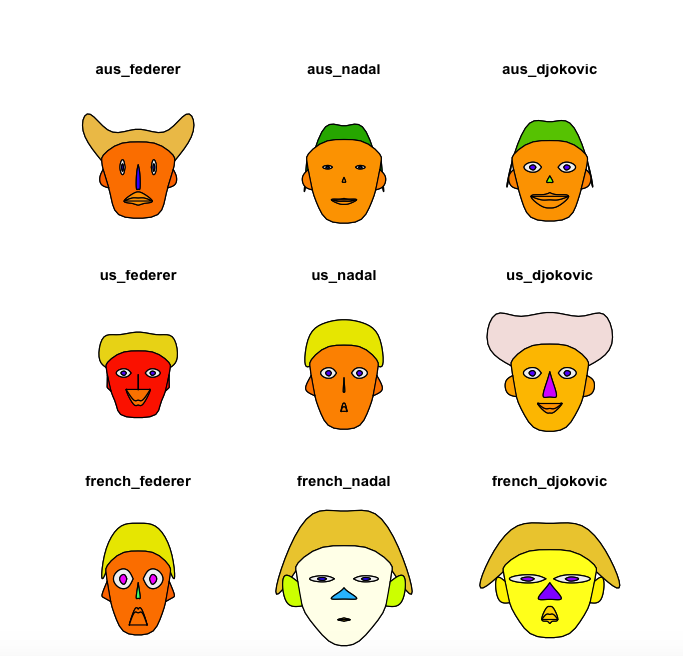

In [64]:
from IPython.display import Image
Image(filename='tennis_fun.png')

"height of face   " "FSP"
 "width of face    " "FSW"
 "structure of face" "SSP"
 "height of mouth  " "SSW"
 "width of mouth   " "ACE"
 "smiling          " "DBF"
 "height of eyes   " "WNR"
 "width of eyes    " "UFE"
 "height of hair   " "BPC"
 "width of hair   "  "BPW"
 "style of hair   "  "NPA"
 "height of nose  "  "NPW"
 "width of nose   "  "TPW"
 "width of ear    "  "FSP"
 "height of ear   "  "FSW"


The actual data used for above.
name,FSP,FSW,SSP,SSW,ACE,DBF,WNR,UFE,BPC,BPW,NPA,NPW,TPW,Result
aus_federer,63.6666666667,44.6666666667,36.3333333333,19.8333333333,8.0,1.33333333333,40.3333333333,26.3333333333,4.33333333333,13.3333333333,23.0,31.3333333333,108.166666667,0.166666666667
aus_nadal,66.7142857143,45.2857142857,33.2857142857,16.7142857143,7.28571428571,1.85714285714,33.1428571429,27.2857142857,4.28571428571,10.1428571429,11.5714285714,15.5714285714,103.571428571,0.857142857143
aus_djokovic,65.4,45.6,34.6,20.4,10.4,2.0,37.0,29.0,5.0,10.8,12.2,17.0,107.2,0.2
us_federer,59.75,41.25,40.25,18.75,8.0,3.0,,,5.5,11.25,19.5,25.5,99.25,0.75
us_nadal,66.8571428571,42.8571428571,33.1428571429,17.4285714286,2.57142857143,1.28571428571,,,5.71428571429,10.7142857143,17.8571428571,22.2857142857,101.285714286,0.0
us_djokovic,68.1666666667,46.3333333333,31.8333333333,17.5,6.83333333333,2.16666666667,,,6.33333333333,14.0,20.8333333333,29.5,114.666666667,0.833333333333
french_federer,66.8,41.4,33.2,17.4,6.2,0.5,42.2,30.2,6.0,10.6,16.2,23.4,104.8,0.2
french_nadal,73.4285714286,53.7142857143,26.5714285714,15.5714285714,4.14285714286,1.71428571429,34.0,29.4285714286,6.14285714286,12.5714285714,13.5714285714,18.8571428571,119.857142857,0.857142857143
french_djokovic,68.5,52.5,31.5,20.5,4.5,1.16666666667,35.5,31.6666666667,5.66666666667,13.1666666667,14.3333333333,23.5,121.333333333,0.833333333333


We can ask many more interesting questions and answer them. Would need more data.
One theory I have is that in the years Nadal won Wimbledon the surface might have been slower than it usually is. This is not to take anything away from Nadal's achievement.
For some the players who have won more than say 8 grand slams we could compute %wins in slam and no of championships in a treemap. size of the box representing no of slams color representing % win in finals etc.


Somehow wimbledon data is not showing. Will fix that and update. Figured out what happened. Name of players in all other majors is like "Roger Federer" etc but in Wimbledon it is "R.Federer" Fixed that and the image now is attached.


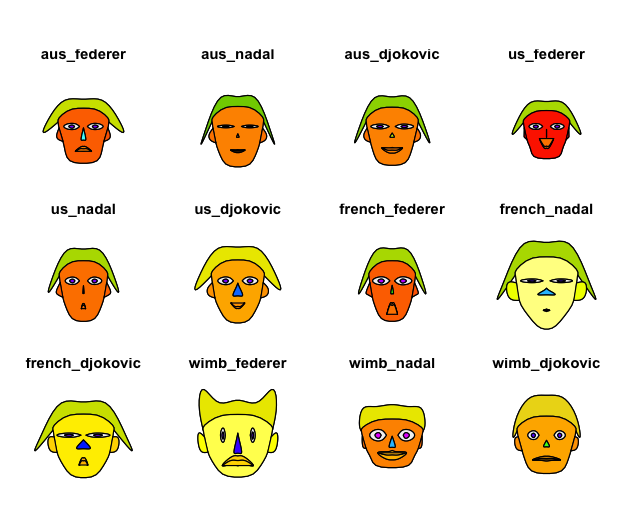

In [1]:
from IPython.display import Image
Image(filename='ten_fun.png')